Ironhack DAPT Jan 2024 - Mid-project


Historical] Restaurant Inspection Scores (2016-2019)


Group' Hungre'



Authors: Shakt



Dataset:Restaurant Inspection Scoress https://data.sfgov.org/Health-and-Social-Services/-Historical-Restaurant-Inspection-Scores-2016-2019/pyih-qa8i/about_data?row_index=0s)


In [1]:
# Import all dependencies 

import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns#
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset 
df = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,94910_20180530,05/30/2018 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,64667_20170814,08/14/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97722_20181217,12/17/2018 12:00:00 AM,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109,NaN,NaN,NaN,1.415530e+10,70220_20170913,09/13/2017 12:00:00 AM,NaN,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117,NaN,NaN,NaN,1.415584e+10,95021_20190228,02/28/2019 12:00:00 AM,92.0,Routine - Unscheduled,95021_20190228_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124,NaN,NaN,NaN,NaN,78289_20161209,12/09/2016 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133,NaN,NaN,NaN,1.415582e+10,100887_20190814,08/14/2019 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Rename the column if columns name are not properly written
df = df.rename(columns=lambda x: x.lower().replace(' ', '_'))

* ## Basic understanding of the dataset

* #### Nans, features, data types, basic stats, head.
* #### Check for more

In [4]:
# Check for more
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,NaN,1.415578e+10,85936_20170925,09/25/2017 12:00:00 AM,100.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,5827_20170224,02/24/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,NaN,NaN,94910_20180530,05/30/2018 12:00:00 AM,NaN,New Ownership - Followup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,64667_20170814,08/14/2017 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,NaN,NaN,97722_20181217,12/17/2018 12:00:00 AM,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  object 
 1   business_name                 51901 non-null  object 
 2   business_address              51901 non-null  object 
 3   business_city                 51901 non-null  object 
 4   business_state                51901 non-null  object 
 5   business_postal_code          50761 non-null  object 
 6   business_latitude             26573 non-null  float64
 7   business_longitude            26573 non-null  float64
 8   business_location             26558 non-null  object 
 9   business_phone_number         17241 non-null  float64
 10  inspection_id                 51901 non-null  object 
 11  inspection_date               51901 non-null  object 
 12  inspection_score              38078 non-null  float64
 13  i

There are lots of null value, missing data

In [6]:
# Check the features 
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'],
      dtype='object')

In [7]:
# Check the data types 
df.dtypes

business_id                      object
business_name                    object
business_address                 object
business_city                    object
business_state                   object
business_postal_code             object
business_latitude               float64
business_longitude              float64
business_location                object
business_phone_number           float64
inspection_id                    object
inspection_date                  object
inspection_score                float64
inspection_type                  object
violation_id                     object
violation_description            object
risk_category                    object
neighborhoods                   float64
sf_find_neighborhoods           float64
current_police_districts        float64
current_supervisor_districts    float64
analysis_neighborhoods          float64
dtype: object

In [8]:
# Check basic stats
df.describe()

,business_latitude,business_longitude,business_phone_number,inspection_score,neighborhoods,sf_find_neighborhoods,current_police_districts,current_supervisor_districts,analysis_neighborhoods
count,26573.000000,26573.000000,1.724100e+04,38078.000000,26533.00000,26533.00000,26545.000000,26545.000000,26545.000000
mean,37.749975,-122.358242,1.415542e+10,86.157624,56.88226,56.88226,5.369184,5.628329,19.509135
std,0.897474,2.908100,1.356890e+06,8.481331,34.70851,34.70851,2.703014,3.294407,11.599060
min,0.000000,-122.510896,1.415020e+10,45.000000,1.00000,1.00000,1.000000,1.000000,1.000000
25%,37.755282,-122.437550,1.415537e+10,81.000000,29.00000,29.00000,3.000000,3.000000,8.000000
50%,37.779847,-122.419308,1.415561e+10,87.000000,53.00000,53.00000,6.000000,5.000000,20.000000
75%,37.788773,-122.407563,1.415580e+10,92.000000,94.00000,94.00000,8.000000,9.000000,30.000000
max,37.824494,0.000000,1.415988e+10,100.000000,117.00000,117.00000,10.000000,11.000000,41.000000


In [9]:
# Check for nans 
df.isna().sum()

business_id                         0
business_name                    2072
business_address                 2072
business_city                    2072
business_state                   2072
business_postal_code             3212
business_latitude               27400
business_longitude              27400
business_location               27415
business_phone_number           36732
inspection_id                    2072
inspection_date                  2072
inspection_score                15895
inspection_type                  2072
violation_id                    15159
violation_description           15159
risk_category                   15159
neighborhoods                   27440
sf_find_neighborhoods           27440
current_police_districts        27428
current_supervisor_districts    27428
analysis_neighborhoods          27428
dtype: int64

In [10]:
#calculates the percentage of missing values,
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

business_id - 0%
business_name - 4%
business_address - 4%
business_city - 4%
business_state - 4%
business_postal_code - 6%
business_latitude - 51%
business_longitude - 51%
business_location - 51%
business_phone_number - 68%
inspection_id - 4%
inspection_date - 4%
inspection_score - 29%
inspection_type - 4%
violation_id - 28%
violation_description - 28%
risk_category - 28%
neighborhoods - 51%
sf_find_neighborhoods - 51%
current_police_districts - 51%
current_supervisor_districts - 51%
analysis_neighborhoods - 51%


In [11]:
#Dropping all naans 
df.dropna(subset=['business_name','business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_location', 'business_phone_number',
       'inspection_id', 'inspection_date', 'inspection_score',
       'inspection_type', 'violation_id', 'violation_description',
       'risk_category', 'neighborhoods', 'sf_find_neighborhoods',
       'current_police_districts', 'current_supervisor_districts',
       'analysis_neighborhoods'], inplace=True) 

I studied the Data very well, I figured out that I Could separate this Data Solution into two parts.
* inspection_score  and * Business
where
*Inspection Score will be my Target Column and bhalu.Beside that, I will inspect all Risk 
and violation under that risk Category.

    So in the end, I will look for the Inspection score, Risk, and violation of Inspection.


In [12]:
# For Inspection score what i don't need I am Dropping all these vcolumn
df.drop(["business_name"], axis=1 , inplace=True)
df.drop(["business_address"], axis=1 , inplace=True)
df.drop(["business_postal_code"], axis=1 , inplace=True)
df.drop(["business_latitude"], axis=1 , inplace=True)
df.drop(["business_longitude"], axis=1 , inplace=True)
df.drop(["business_location"], axis=1 , inplace=True)
df.drop(["business_phone_number"], axis=1 , inplace=True)
df.drop(["inspection_id"], axis=1 , inplace=True)
df.drop(["violation_id"], axis=1 , inplace=True)
df.drop(["neighborhoods"], axis=1 , inplace=True)
df.drop(["sf_find_neighborhoods"], axis=1 , inplace=True)
df.drop(["current_police_districts"], axis=1 , inplace=True) 
df.drop(["current_supervisor_districts"], axis=1 , inplace=True)
df.drop(["analysis_neighborhoods"], axis=1 , inplace=True)

In [13]:
#After dropping Looking the Data
df.head()

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category
110,3649,San Francisco,CA,12/06/2017 12:00:00 AM,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk
119,184,San Francisco,CA,02/13/2018 12:00:00 AM,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk
122,1154,San Francisco,CA,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk
123,1636,San Francisco,CA,10/03/2018 12:00:00 AM,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk
173,7764,San Francisco,CA,07/18/2018 12:00:00 AM,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk


* ## Data Featuring,
I am giving a new column with categories for the risk_category column, which
will explain the cause of risk_category according to the new column.
* #### Column name -(public_health_effect) featuring three effect of the risk_category to the publick health
* High Risk-food borne illnesses
* Moderate Risk-Diggyness
* Low Risk- no immediate risk

In [14]:
# Convert 'risk_category' column to numeric (assuming it contains strings like 'Moderate Risk', 'Low Risk', etc.)
df["public_health_effect"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "food borne illnesses"
    elif risk_category in ['Moderate Risk']:
        return "Diggyness"
    else:
        return "no immediate risk"

df["public_health_effect"] = df["risk_category"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect
110,3649,San Francisco,CA,12/06/2017 12:00:00 AM,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness
119,184,San Francisco,CA,02/13/2018 12:00:00 AM,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness
122,1154,San Francisco,CA,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness
123,1636,San Francisco,CA,10/03/2018 12:00:00 AM,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk
173,7764,San Francisco,CA,07/18/2018 12:00:00 AM,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,09/14/2017 12:00:00 AM,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
38042,68442,San Francisco,CA,02/21/2019 12:00:00 AM,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk
38045,67330,San Francisco,CA,02/08/2018 12:00:00 AM,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk
38099,69769,San Francisco,CA,06/13/2017 12:00:00 AM,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness


In [15]:
#Value count for risk_category
df["risk_category"].value_counts()

risk_category
Low Risk         2467
Moderate Risk    1877
High Risk         722
Name: count, dtype: int64

In [16]:
#Should be same result
df["public_health_effect"].value_counts()

public_health_effect
no immediate risk       2467
Diggyness               1877
food borne illnesses     722
Name: count, dtype: int64

In [17]:
#
df.columns

Index(['business_id', 'business_city', 'business_state', 'inspection_date',
       'inspection_score', 'inspection_type', 'violation_description',
       'risk_category', 'public_health_effect'],
      dtype='object')

* ## Now Starting Inspection score target,
* I am  going to take only 4 columns for the Inspection_score

In [18]:
#Inspection Score column
column_i = 'business_id','inspection_date','inspection_score','inspection_type'

In [19]:
#creates a new DataFrame inspection_data containing selected columns 
#('business_id', 'inspection_date', 'inspection_score', and 'inspection_type')
#from the sorted DataFrame, and finally displays this new DataFrame
df_sorted = df.sort_values(by='inspection_score', ascending=False)


inspection_data = pd.DataFrame({
    'Business ID': df_sorted['business_id'],
    'Inspection Date': df_sorted['inspection_date'],
    'Inspection Score': df_sorted['inspection_score'],
    'Inspection Type': df_sorted['inspection_type']
})

display(inspection_data)


,Business ID,Inspection Date,Inspection Score,Inspection Type
7575,5908,02/14/2018 12:00:00 AM,98.0,Routine - Unscheduled
13971,1147,05/23/2017 12:00:00 AM,98.0,Routine - Unscheduled
8525,9155,03/28/2018 12:00:00 AM,98.0,Routine - Unscheduled
13952,6007,12/05/2017 12:00:00 AM,98.0,Routine - Unscheduled
13942,5820,02/15/2017 12:00:00 AM,98.0,Routine - Unscheduled
...,...,...,...,...
17154,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
16917,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
503,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled
13716,1154,03/27/2019 12:00:00 AM,46.0,Routine - Unscheduled


* Grouping the score-
* (45.948, 51.2]
* (51.2, 56.4]
* (56.4, 61.6]
* (61.6, 66.8]
* (66.8, 72.0]
* (72.0, 77.2]
* (77.2, 82.4]
* (82.4, 87.6]
* (87.6, 92.8]
* (92.8, 98.0)       934

In [20]:
#so defining the inspection score
df_inspection_score= df.sort_values(by='inspection_score', ascending=False)
grouped_by_score = df_inspection_score.groupby(pd.cut(df_sorted['inspection_score'], bins=10))
grouped_by_score_counts = grouped_by_score.size()
print(grouped_by_score_counts)


inspection_score
(45.948, 51.2]      24
(51.2, 56.4]         0
(56.4, 61.6]        27
(61.6, 66.8]        95
(66.8, 72.0]       301
(72.0, 77.2]       399
(77.2, 82.4]       672
(82.4, 87.6]      1102
(87.6, 92.8]      1512
(92.8, 98.0]       934
dtype: int64


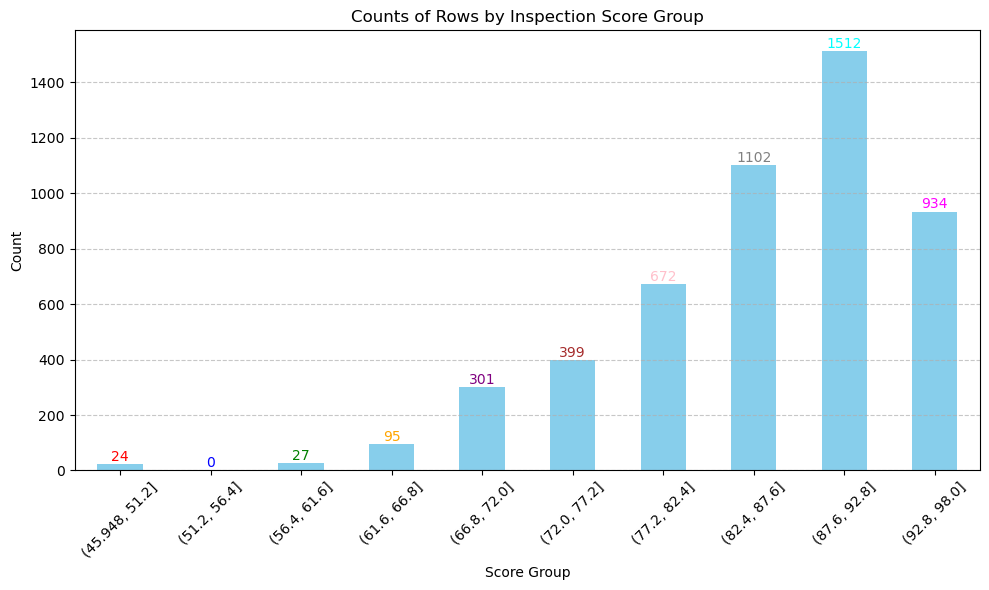

In [21]:
plt.figure(figsize=(10, 6))
ax = grouped_by_score_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Rows by Inspection Score Group')
plt.xlabel('Score Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define colors for annotations
annotation_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Annotate bars with their respective counts and adjust text color
for i, (count, color) in enumerate(zip(grouped_by_score_counts, annotation_colors)):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', color=color)

plt.tight_layout()
plt.show()

* #### Let's look for the Highest score and Lowest with all information and the top 3 und bottom 3 also

In [22]:
max_inspection_score_row_index = df['inspection_score'].idxmax()
max_inspection_score_row = df.loc[max_inspection_score_row_index]
print(max_inspection_score_row)

business_id                                                          5854
business_city                                               San Francisco
business_state                                                         CA
inspection_date                                    02/27/2018 12:00:00 AM
inspection_score                                                     98.0
inspection_type                                     Routine - Unscheduled
violation_description    Unapproved or unmaintained equipment or utensils
risk_category                                                    Low Risk
public_health_effect                                    no immediate risk
Name: 357, dtype: object


In [23]:

df['inspection_date'] = pd.to_datetime(df['inspection_date'])
df['inspection_year'] = df['inspection_date'].dt.year
time_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmax()]
time_interval = time_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

# Print the result
print(time_interval)


      inspection_year inspection_date  inspection_score        inspection_type
2588             2016      2016-11-03              98.0  Routine - Unscheduled
1178             2017      2017-10-30              98.0  Routine - Unscheduled
357              2018      2018-02-27              98.0  Routine - Unscheduled
529              2019      2019-06-19              98.0  Routine - Unscheduled


In [24]:
min_inspection_score_index = df['inspection_score'].idxmin()
min_inspection_score_row = df.loc[min_inspection_score_index]
print(min_inspection_score_row)

business_id                                                           1154
business_city                                                San Francisco
business_state                                                          CA
inspection_date                                        2019-03-27 00:00:00
inspection_score                                                      46.0
inspection_type                                      Routine - Unscheduled
violation_description    Inadequate and inaccessible handwashing facili...
risk_category                                                Moderate Risk
public_health_effect                                             Diggyness
inspection_year                                                       2019
Name: 122, dtype: object


In [25]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

df['inspection_year'] = df['inspection_date'].dt.year

min_inspection_interval = df.loc[df.groupby('inspection_year')['inspection_score'].idxmin()]
min_inspection_interval = min_inspection_interval[['inspection_year', 'inspection_date', 'inspection_score', 'inspection_type']]

print(min_inspection_interval)



       inspection_year inspection_date  inspection_score  \
1024              2016      2016-11-01              67.0   
1156              2017      2017-04-07              60.0   
19044             2018      2018-09-14              51.0   
122               2019      2019-03-27              46.0   

             inspection_type  
1024   Routine - Unscheduled  
1156   Routine - Unscheduled  
19044  Routine - Unscheduled  
122    Routine - Unscheduled  


In [26]:
df_yearly= df.loc[df.groupby(['inspection_date', 'inspection_score', 'public_health_effect'])['inspection_score'].transform('count') > 1]
df_yearly

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018
213,59044,San Francisco,CA,2018-01-22,78.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2018
...,...,...,...,...,...,...,...,...,...,...
37851,71909,San Francisco,CA,2019-02-20,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2019
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017


In [27]:
# Extracting year from inspection_date
df['inspection_year'] = pd.to_datetime(df['inspection_date']).dt.year

# Grouping by inspection_year
grouped_by_year = df.groupby('inspection_year')

# Getting the counts for each year group
grouped_by_year_counts = grouped_by_year.size()
grouped_by_year_counts

inspection_year
2016     382
2017    1655
2018    1619
2019    1410
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


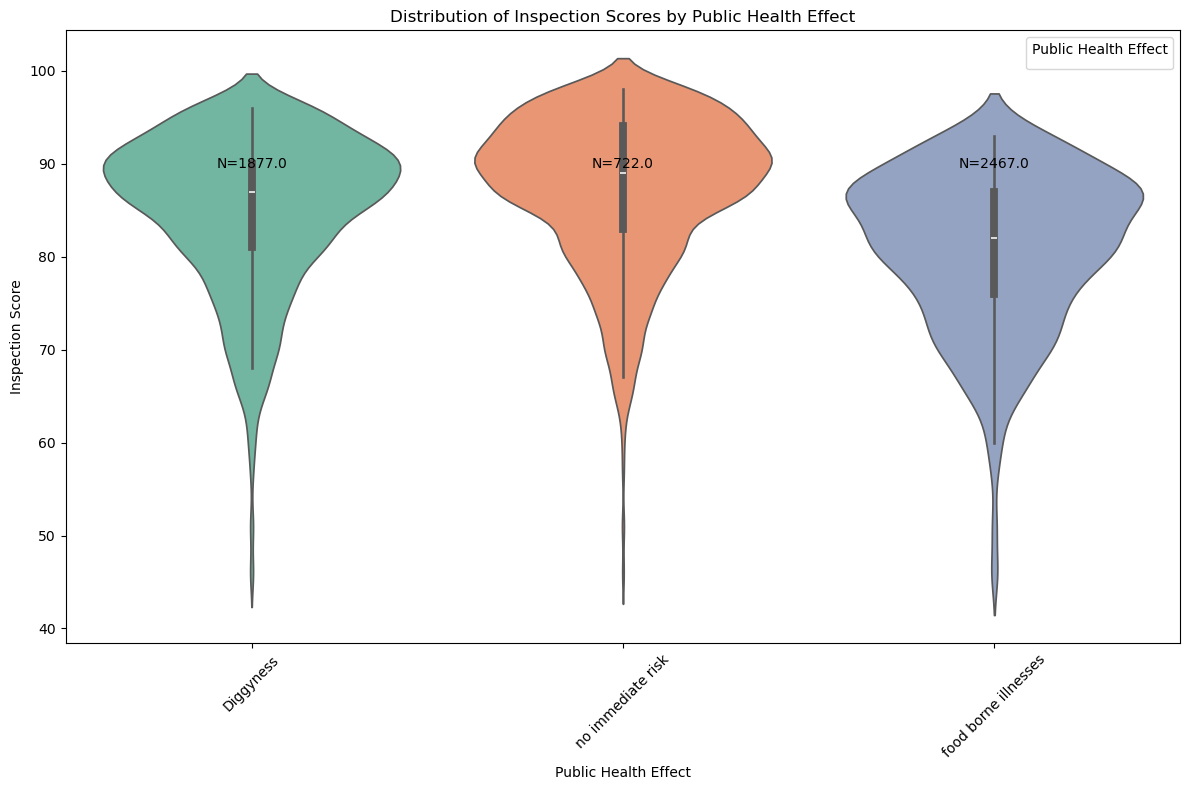

In [30]:
# Group by 'public_health_effect' and calculate summary statistics for 'inspection_score'
grouped_df = df.groupby('public_health_effect')['inspection_score'].describe().reset_index()

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='public_health_effect', y='inspection_score', data=df, hue='public_health_effect', palette='Set2')
plt.title('Distribution of Inspection Scores by Public Health Effect')
plt.xlabel('Public Health Effect')
plt.ylabel('Inspection Score')
plt.xticks(rotation=45)
plt.legend(title='Public Health Effect')

# Adding annotations for number of inspections
for i, cat in enumerate(grouped_df['public_health_effect'].unique()):
    count = grouped_df[grouped_df['public_health_effect'] == cat]['count'].iloc[0]
    plt.text(i, 90, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


* ## Inspeting more
* #### I want to count violation_description, and  put in which public_health_effect
* ####  where I want to see in which inspection they come and also add inspection_date
* #### For that I am selecting another column to get more information
* violation_description	risk_category	public_health_effect inspection_date	inspection_score
* for that I am doing some more steps, which are
* #### 1 Categorising Inspection score as responce_result where under 60 as Fail('No) and above 60 as Pass(Yes)
* #### 2 Counting response result as risk_category
* #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
* #### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star
* #### 5 Looking with fail also they got ratings or not
* #### 6 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category
* #### Now doing one more time Data featuring in violation_category

In [31]:
df["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df["responce_result"] = df["inspection_score"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes
...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes


#### 2 Counting response result as risk_category 

In [32]:
responce_count = df.groupby('responce_result').size().reset_index(name='count')
risck_responce = df.groupby(['risk_category','responce_result']).apply(list).reset_index()
display(risck_responce)


,risk_category,responce_result,0
0,High Risk,NO,"[business_id, business_city, business_state, i..."
1,High Risk,Yes,"[business_id, business_city, business_state, i..."
2,Low Risk,NO,"[business_id, business_city, business_state, i..."
3,Low Risk,Yes,"[business_id, business_city, business_state, i..."
4,Moderate Risk,NO,"[business_id, business_city, business_state, i..."
5,Moderate Risk,Yes,"[business_id, business_city, business_state, i..."


 #### 3 Ploting separately and counting all inspection_scores with each risk_categoryy , they are Pass or not
 i have to redo it , because i have all this value there

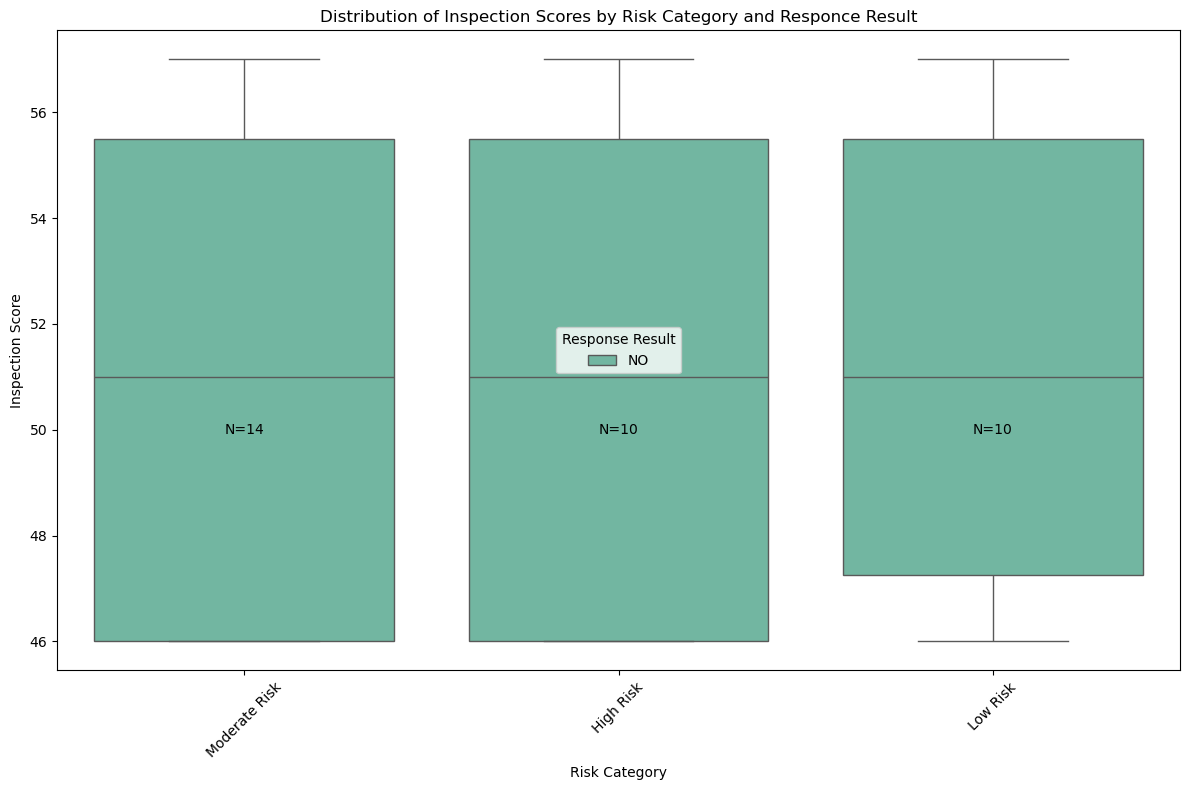

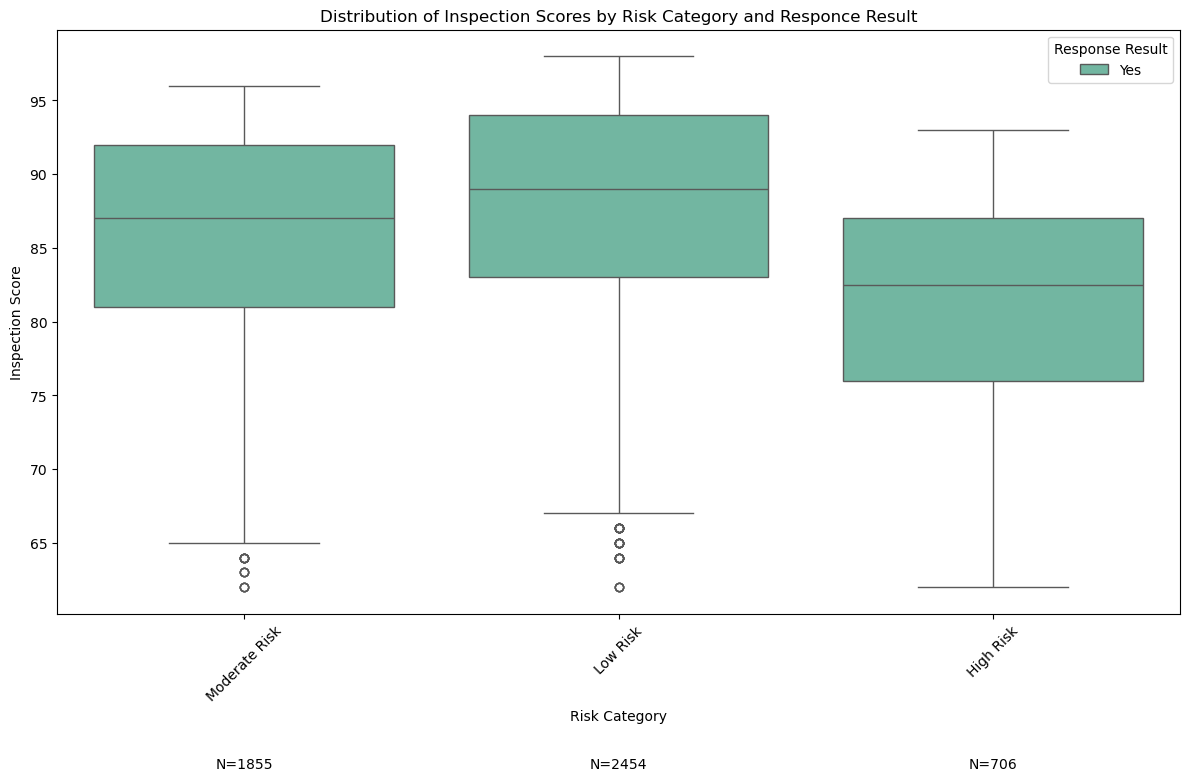

In [57]:
filtered_df = df[(df['inspection_score'] < 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df['risk_category'].unique()):
    count = filtered_df[filtered_df['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()

filtered_df_1 = df[(df['inspection_score'] > 60) & df['risk_category'].notnull()]
plt.figure(figsize=(12, 8))

# Plot for inspection scores < 60
sns.boxplot(x='risk_category', y='inspection_score', hue='responce_result', data=filtered_df_1, palette='Set2')
plt.title('Distribution of Inspection Scores by Risk Category and Responce Result')
plt.xlabel('Risk Category')
plt.ylabel('Inspection Score')
plt.legend(title='Response Result')
plt.xticks(rotation=45)

# Adding annotations for number of inspections
for i, cat in enumerate(filtered_df_1['risk_category'].unique()):
    count = filtered_df_1[filtered_df_1['risk_category'] == cat]['inspection_score'].count()
    plt.text(i, 50, f'N={count}', ha='center', va='center')

plt.tight_layout()
plt.show()


#### 4 giving ratings high risk as 0 , meditate risk as 3,5 and Low risk as 5 star

In [58]:
df["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df["ratings"] = df["risk_category"].apply(lambda x : advisor (x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes,3.5,Contaminated
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes,5,unclean
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes,5,unclean
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes,5,Contaminated
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes,3.5,unclean


* #### 6 what is the reason behind , even after fail they are having nice rating?
* it givs the result, in which (public_health_effect) , we can look this with violation_category 

In [59]:

response_counts = df.groupby('ratings')['responce_result'].value_counts().unstack().fillna(0)

print(response_counts)


responce_result  NO   Yes
ratings                  
0                10   712
3.5              14  1863
5                10  2457


* #### 6 Ploting it

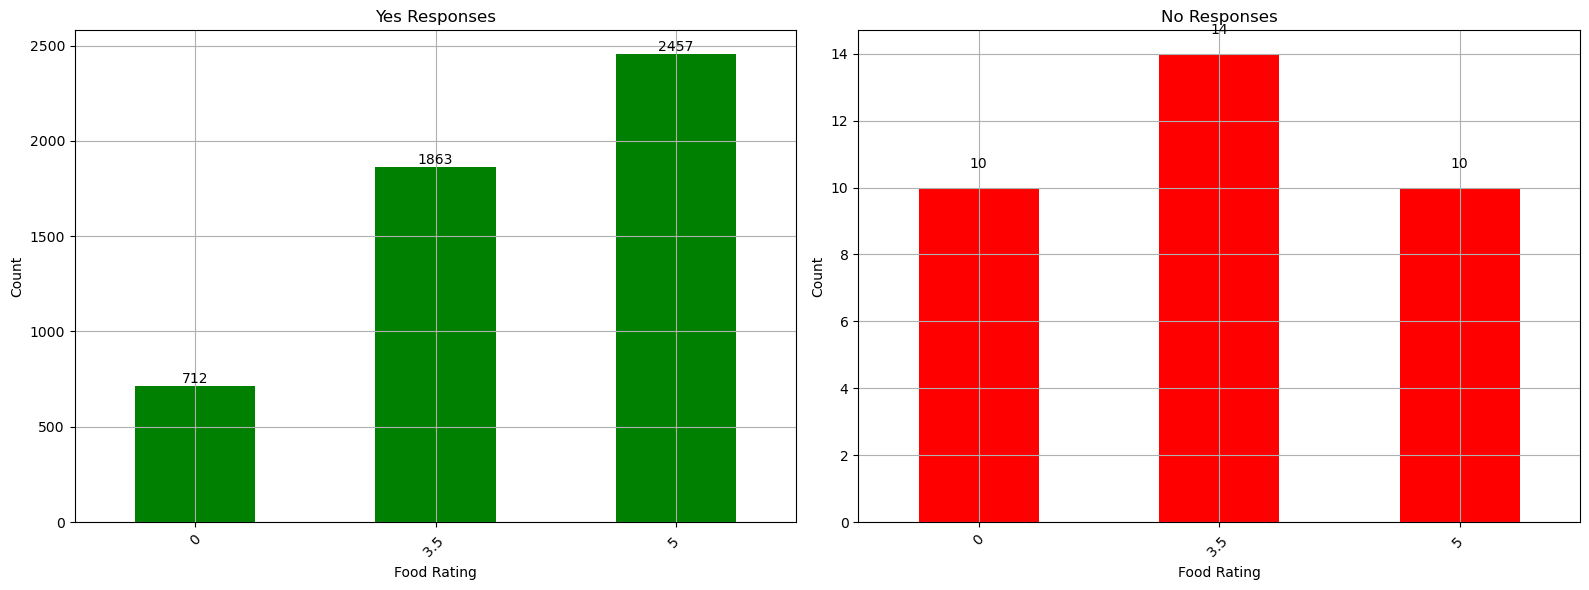

In [60]:

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting 'Yes' responses
response_counts['Yes'].plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Yes Responses')
axes[0].set_xlabel('Food Rating')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(response_counts.index, rotation=45)
axes[0].grid(True)

# Add count labels on the bars for 'Yes' responses
for index, value in enumerate(response_counts['Yes']):
    axes[0].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Plotting 'No' responses
response_counts['NO'].plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('No Responses')
axes[1].set_xlabel('Food Rating')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(response_counts.index, rotation=45)
axes[1].grid(True)

# Add count labels on the bars for 'No' responses
for index, value in enumerate(response_counts['NO']):
    axes[1].text(index, value + 0.5, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


* #### Now doing one more time Data featuring in violation_category

In [61]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

# Applying the advisor function to create the violation category column
df["violation_Category"] = df["violation_description"].apply(lambda x: advisor(x))
df

,business_id,business_city,business_state,inspection_date,inspection_score,inspection_type,violation_description,risk_category,public_health_effect,inspection_year,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,2017,Yes,3.5,Contaminated
119,184,San Francisco,CA,2018-02-13,90.0,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,2018,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
123,1636,San Francisco,CA,2018-10-03,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,2018,Yes,5,unclean
173,7764,San Francisco,CA,2018-07-18,90.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,2017-09-14,84.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2017,Yes,5,unclean
38042,68442,San Francisco,CA,2019-02-21,88.0,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,2019,Yes,5,Contaminated
38045,67330,San Francisco,CA,2018-02-08,88.0,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,2018,Yes,5,unclean
38099,69769,San Francisco,CA,2017-06-13,88.0,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,2017,Yes,3.5,unclean


In [62]:
df.to_csv('inspection_score.csv')

In [63]:
df["violation_Category"].value_counts()

violation_Category
unclean              1556
Contaminated          807
lack of equipment     769
Under Temperature     753
Lack Certificate      476
Unmanage              472
UnderMaintenance      144
untrained worker       85
not convinced           4
Name: count, dtype: int64

In [64]:
df["responce_result"].value_counts()

responce_result
Yes    5032
NO       34
Name: count, dtype: int64

responce_result = no 

In [65]:
no_responses = df[df['responce_result'] == 'NO'][['ratings', 'violation_Category']]
print(no_responses)


      ratings violation_Category
122      3.5   lack of equipment
503         0            unclean
1842     3.5    Lack Certificate
3043        0  Under Temperature
8920       5            Unmanage
10359      5             unclean
11499    3.5            Unmanage
12852       0            unclean
13716       0       Contaminated
16437    3.5    untrained worker
16917      5             unclean
17154    3.5        Contaminated
19044      5   lack of equipment
19176      5            Unmanage
20282       0  Under Temperature
20639    3.5   lack of equipment
21326    3.5        Contaminated
21687      5   lack of equipment
21783    3.5    untrained worker
22835       0  Under Temperature
23719      5   lack of equipment
25162    3.5   Under Temperature
26385       0            unclean
26890    3.5    Lack Certificate
26911    3.5            Unmanage
30781      5   lack of equipment
30872       0  Under Temperature
33005      5    Lack Certificate
33025    3.5        Contaminated
34147     

In [66]:
grouped_no_responses = no_responses.groupby(['ratings', 'violation_Category']).size().reset_index(name='count')
print(grouped_no_responses)


   ratings violation_Category  count
0        0       Contaminated      1
1        0  Under Temperature      4
2        0            unclean      5
3     3.5        Contaminated      3
4     3.5    Lack Certificate      3
5     3.5   Under Temperature      1
6     3.5            Unmanage      3
7     3.5   lack of equipment      2
8     3.5    untrained worker      2
9       5    Lack Certificate      1
10      5            Unmanage      2
11      5   lack of equipment      4
12      5             unclean      3


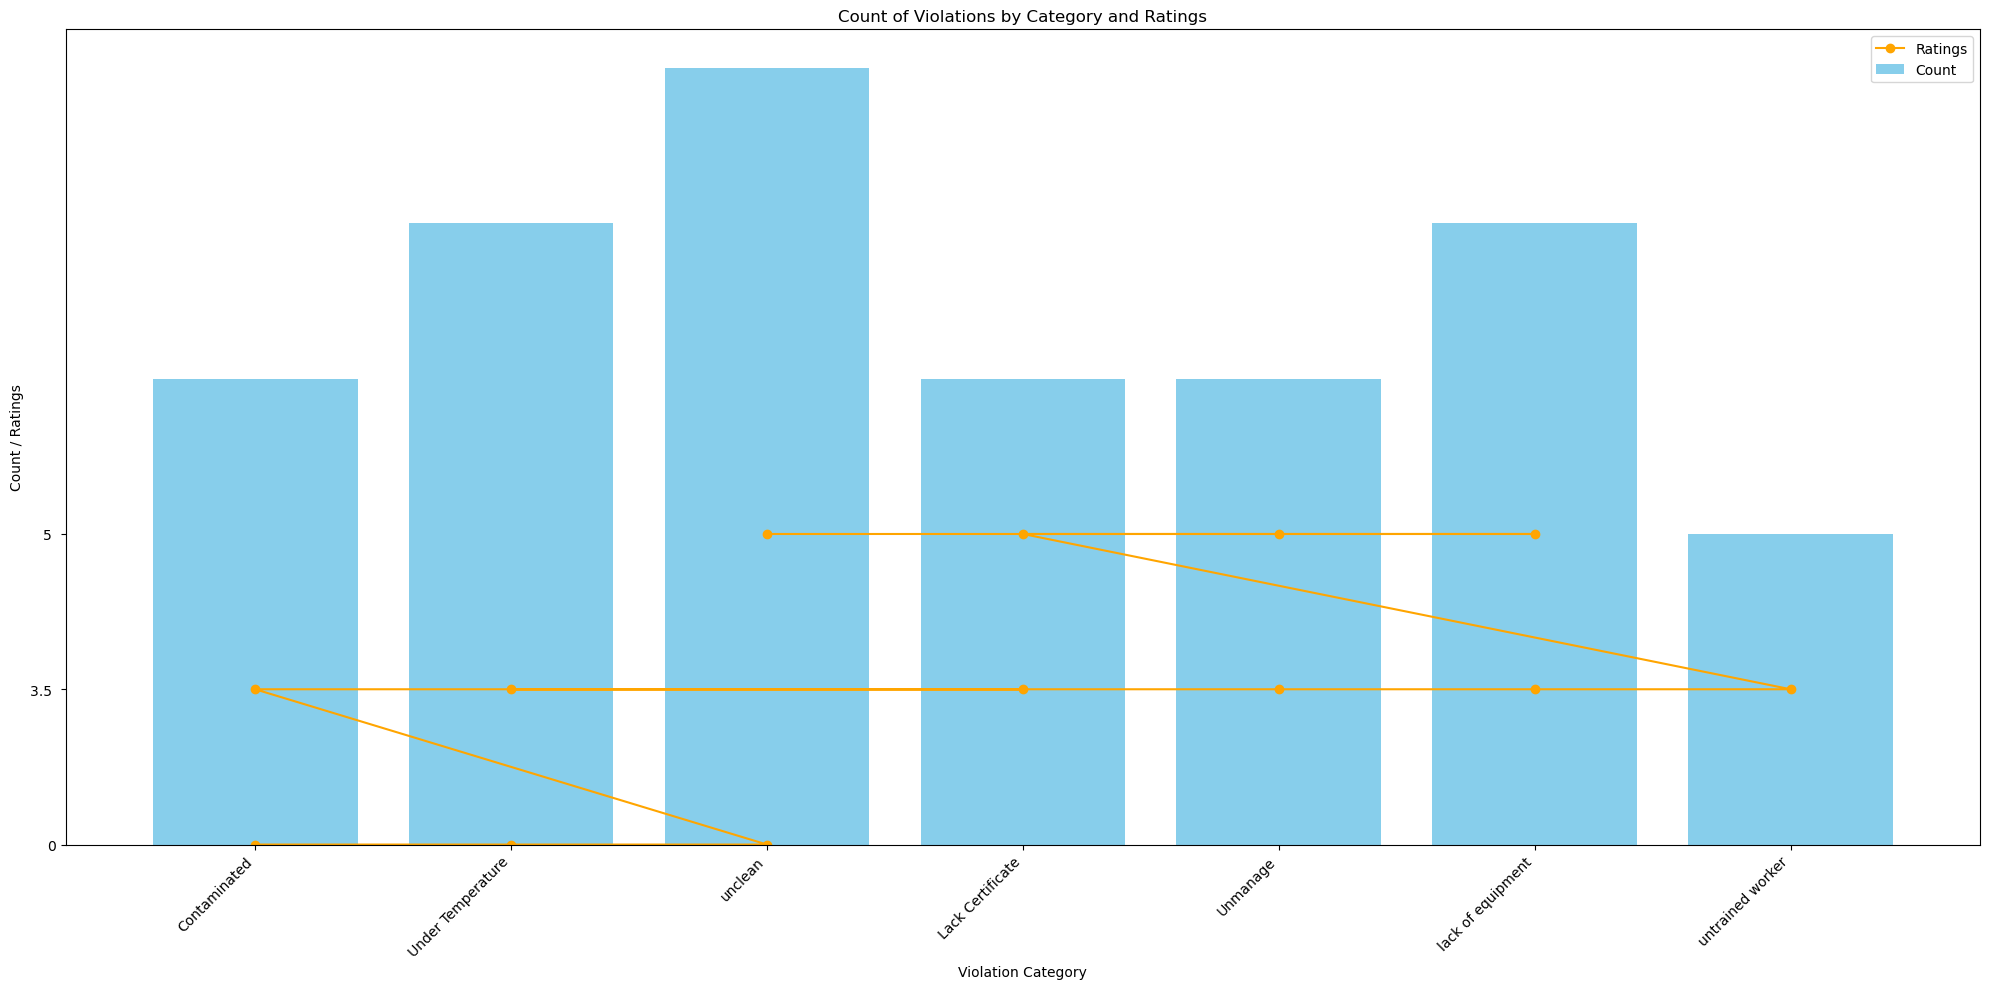

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_no_responses contains the grouped data
df1 = pd.DataFrame(grouped_no_responses)

# Plot
plt.figure(figsize=(20, 10))  
plt.bar(df1['violation_Category'], df1['count'], color='skyblue', label='Count')
plt.plot(df1['violation_Category'], df1['ratings'], marker='o', color='orange', label='Ratings')
plt.xlabel('Violation Category')
plt.ylabel('Count / Ratings')
plt.title('Count of Violations by Category and Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [68]:
# Selecting the specified columns and dropping duplicates
unique_combinations = df[['responce_result', 'ratings', 'violation_Category', 'risk_category']].drop_duplicates()

# Ensure that there are exactly 9 unique types of 'violation_Category'
unique_violations = unique_combinations['violation_Category'].nunique()
if unique_violations < 9:
    print("There are less than 9 unique types of 'violation_Category' in the dataset.")
    print("Please ensure there are at least 9 unique types for accurate results.")
else:
    unique_combinations = unique_combinations.head(9)
    print(unique_combinations)



    responce_result ratings violation_Category  risk_category
110             Yes    3.5        Contaminated  Moderate Risk
119             Yes    3.5   Under Temperature  Moderate Risk
122              NO    3.5   lack of equipment  Moderate Risk
123             Yes      5             unclean       Low Risk
213             Yes    3.5   lack of equipment  Moderate Risk
215             Yes      5            Unmanage       Low Risk
245             Yes       0            unclean      High Risk
247             Yes    3.5             unclean  Moderate Risk
259             Yes      5   lack of equipment       Low Risk


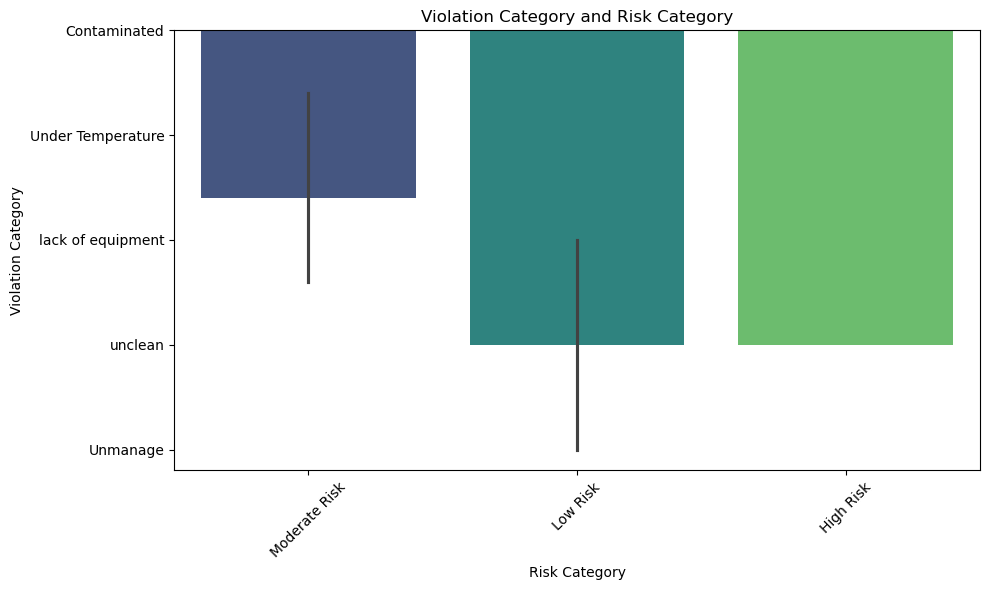

In [104]:

plt.figure(figsize=(10, 6))
sns.barplot(data=unique_combinations, x='risk_category', y='violation_Category', palette='viridis')
plt.title('Violation Category and Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Violation Category')
plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()

# Show the plot
plt.show()


In [73]:
# Sort the DataFrame by 'inspection_score' in ascending order
df_sorted = df.sort_values(by='inspection_score', ascending=True)

# Select the top 3 rows
top_3_low_scores = df_sorted.head(3)

# Create a DataFrame with selected columns
top_3_inspection_data = pd.DataFrame({
    'Business ID': top_3_low_scores['business_id'],
    'City': top_3_low_scores['business_city'],
    'State': top_3_low_scores['business_state'],
    'Inspection Date': top_3_low_scores['inspection_date'],
    'Inspection Score': top_3_low_scores['inspection_score'],
    'Inspection Type': top_3_low_scores['inspection_type'],
    'Violation Description': top_3_low_scores['violation_description'],
    'Risk Category': top_3_low_scores['risk_category'],
    'Public Health Effect': top_3_low_scores['public_health_effect'],
    'Inspection Year': top_3_low_scores['inspection_year'],
    'Response Result': top_3_low_scores['responce_result'],
    'Ratings': top_3_low_scores['ratings'],
    'Violation Category': top_3_low_scores['violation_Category']
})

# Display the DataFrame
display(top_3_inspection_data)


,Business ID,City,State,Inspection Date,Inspection Score,Inspection Type,Violation Description,Risk Category,Public Health Effect,Inspection Year,Response Result,Ratings,Violation Category
12852,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Unclean or unsanitary food contact surfaces,High Risk,food borne illnesses,2019,NO,0,unclean
122,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,2019,NO,3.5,lack of equipment
3043,1154,San Francisco,CA,2019-03-27,46.0,Routine - Unscheduled,High risk food holding temperature,High Risk,food borne illnesses,2019,NO,0,Under Temperature


In [74]:
# Selecting only numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_data = df[numeric_columns]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

correlation_matrix

,inspection_score,inspection_year
inspection_score,1.000000,-0.049818
inspection_year,-0.049818,1.000000


In [75]:

correlation_matrix = numeric_data.corr().abs()
correlation_matrix

,inspection_score,inspection_year
inspection_score,1.000000,0.049818
inspection_year,0.049818,1.000000


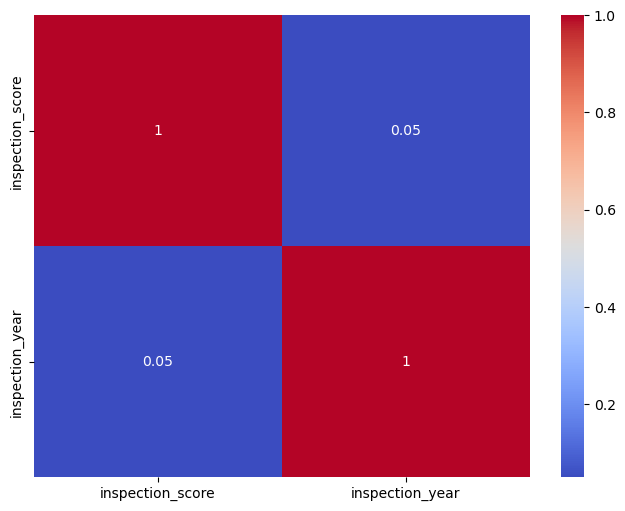

In [76]:
plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [77]:
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns

,business_id,business_city,business_state,inspection_type,violation_description,risk_category,public_health_effect,responce_result,ratings,violation_Category
110,3649,San Francisco,CA,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,Diggyness,Yes,3.5,Contaminated
119,184,San Francisco,CA,Routine - Unscheduled,Insufficient hot water or running water,Moderate Risk,Diggyness,Yes,3.5,Under Temperature
122,1154,San Francisco,CA,Routine - Unscheduled,Inadequate and inaccessible handwashing facili...,Moderate Risk,Diggyness,NO,3.5,lack of equipment
123,1636,San Francisco,CA,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,no immediate risk,Yes,5,unclean
173,7764,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
...,...,...,...,...,...,...,...,...,...,...
37965,67237,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
38042,68442,San Francisco,CA,Routine - Unscheduled,Low risk vermin infestation,Low Risk,no immediate risk,Yes,5,Contaminated
38045,67330,San Francisco,CA,Routine - Unscheduled,Unclean or degraded floors walls or ceilings,Low Risk,no immediate risk,Yes,5,unclean
38099,69769,San Francisco,CA,Routine - Unscheduled,Inadequately cleaned or sanitized food contact...,Moderate Risk,Diggyness,Yes,3.5,unclean


In [78]:
#Lest Jump in DecisionTreeClassifier
#To test Food Rating Accurecy

# Features (inspection score) and target (food rating)
X = df[['inspection_score']]
y = df['responce_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [79]:
# Assuming you already have your DataFrame df with 'inspection_score' and 'food_rating' columns

# Split the data into features (X) and target variable (y)
X = df[['inspection_score']]
y = df['responce_result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [80]:
# Predict on train data
y_train_pred = model.predict(X_train)

# Calculate accuracy on train set
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy_train)

Accuracy on train set: 1.0


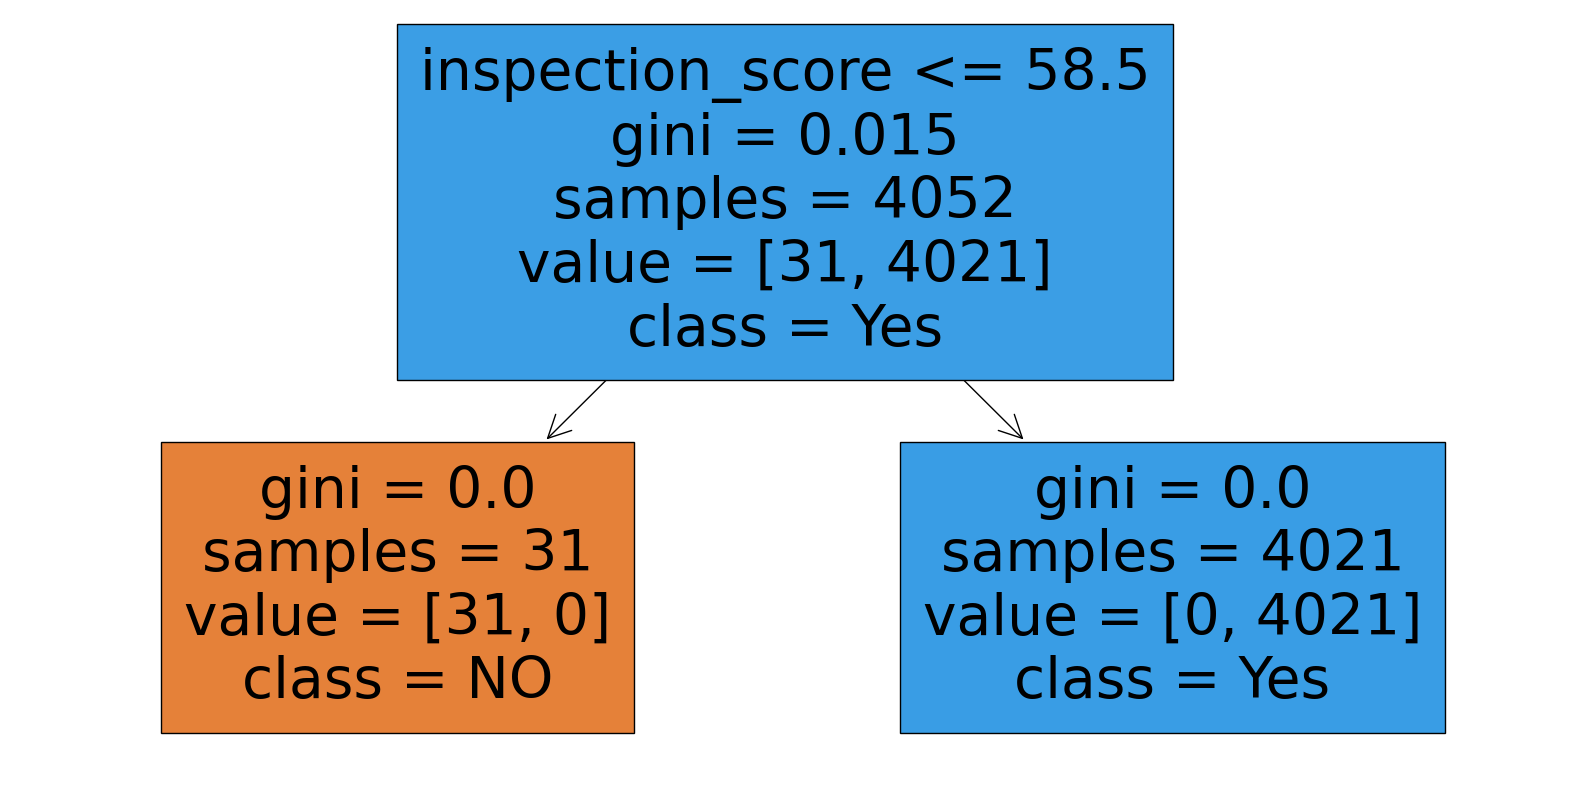

In [81]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()


In [84]:
X = df[['inspection_score']]
y = df['responce_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [85]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

In [86]:
print(X_resampled_df)

       inspection_score
0                  82.0
1                  90.0
2                  46.0
3                  88.0
4                  90.0
...                 ...
10059              46.0
10060              46.0
10061              57.0
10062              51.0
10063              51.0

[10064 rows x 1 columns]


In [ ]:
y_resampled_df

In [ ]:
y_resampled_df.value_counts()

In [ ]:
df_business = pd.read_csv("_Historical__Restaurant_Inspection_Scores__2016-2019__20240401.csv")
df_business

In [ ]:
#Business 
('business_id''name''address''city''state''postal_code''latitude'	'longitude'	'phone_number')

In [ ]:
df_business = df_business.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [ ]:
df_business.head()

In [ ]:
# Check the data types 
df_business.dtypes

In [ ]:
df_business.isna().sum()

In [ ]:
for col in df_business.columns:
    pct_missing = np.mean(df_business[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

In [ ]:
# Specify the columns to drop
columns_to_drop = [
    "business_location", 
    "inspection_id", 
    "inspection_date", 
    "inspection_type", 
    "violation_id",  
    "neighborhoods", 
    "sf_find_neighborhoods", 
    "current_police_districts", 
    "analysis_neighborhoods"
]

# Drop the specified columns
df_business.drop(columns_to_drop, axis=1, inplace=True)
df_business

In [ ]:
df_business.columns

In [ ]:
df_business.dropna(subset=['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_postal_code', 'business_latitude',
       'business_longitude', 'business_phone_number', 'inspection_score',
       'violation_description','risk_category', 'current_supervisor_districts'], inplace=True) 

In [ ]:
df_business

In [ ]:
def advisor(violation_description):
    if violation_description in ['Unclean or degraded floors walls or ceilings',
                                 'Inadequately cleaned or sanitized food contact surfaces',
                                 'Wiping cloths not clean or properly stored or inadequate sanitizer',
                                 'Unclean nonfood contact surfaces',
                                 'Unclean or unsanitary food contact surfaces',
                                 'Unclean hands or improper use of gloves',
                                 'Unclean unmaintained or improperly constructed toilet facilities',
                                 'Unsanitary employee garments hair or nails']:
        return "unclean"
    elif violation_description in ['Unapproved or unmaintained equipment or utensils',
                                   'Inadequate and inaccessible handwashing facilities',
                                   'Inadequate warewashing facilities or equipment',
                                   'No thermometers or uncalibrated thermometers']:
        return "lack of equipment"
    elif violation_description in ['Moderate risk food holding temperature',
                                   'High risk food holding temperature',
                                   'Insufficient hot water or running water',
                                   'Improper cooling methods',
                                   'No hot water or running water']:
        return "Under Temperature"
    elif violation_description in ['Moderate risk vermin infestation',
                                   'Foods not protected from contamination',
                                   'Low risk vermin infestation',
                                   'Contaminated or adulterated food',
                                   'High risk vermin infestation',
                                   'Sewage or wastewater contamination']:
        return "Contaminated"
    elif violation_description in ['Improper food storage',
                                   'Improper storage of equipment utensils or linens',
                                   'Improper thawing methods',
                                   'Improper storage use or identification of toxic substances',
                                   'Inadequate dressing rooms or improper storage of personal items',
                                   'Reservice of previously served foods',
                                   'No person in charge of food facility',
                                   'Unapproved living quarters in food facility',
                                   'Unapproved food source',
                                   'Other moderate risk violation',
                                   'Other high risk violation']:
        return "Unmanage"
    elif violation_description in ['Food safety certificate or food handler card not available',
                                   'Inadequate food safety knowledge or lack of certified food safety manager',
                                   'Permit license or inspection report not posted',
                                   'Other low risk violation',
                                   'Noncompliance with HAACP plan or variance',
                                   'Improper food labeling or menu misrepresentation',
                                   'Inadequate procedures or records for time as a public health control',
                                   'Inadequate or unsanitary refuse containers or area or no garbage service',
                                   'No plan review or Building Permit',
                                   'Unauthorized or unsafe use of time as a public health control measure',
                                   'Worker safety hazards',
                                   'Non service animal',
                                   'Unpermitted food facility',
                                   'Inadequate HACCP plan record keeping']:
        return "Lack Certificate"
    elif violation_description in ['Improper or defective plumbing', 'Inadequate ventilation or lighting']:
        return "UnderMaintenance"
    elif violation_description in ['Employee eating or smoking',
                                   'Food in poor condition',
                                   'Improper reheating of food',
                                   'Noncompliance with shell fish tags or display',
                                   'Inadequate sewage or wastewater disposal']:
        return "untrained worker"
    elif violation_description in ['Low Risk', 'Moderate Risk']:
        return "expire-food reserve"
    else:
        return "not convinced"

# Applying the advisor function to create the violation category column
df_business["violation_Category"] = df_business["violation_description"].apply(lambda x: advisor(x))
df_business

In [ ]:
df_business["responce_result"] = pd.to_numeric(df["inspection_score"], errors='coerce')
    
def advisor(inspection_score):
    if inspection_score < 60:
        return "NO"
    else:
        return "Yes"

df_business["responce_result"] = df_business["inspection_score"].apply(lambda x : advisor (x))
df_business

In [ ]:
df_business["ratings"] = pd.to_numeric(df["risk_category"], errors='coerce')

def advisor(risk_category):
    if risk_category == 'High Risk':
        return "0"
    elif risk_category in ['Moderate Risk']:
        return "3.5 "
    else:
        return "5 "

df_business["ratings"] = df_business["risk_category"].apply(lambda x : advisor (x))
df_business

In [ ]:
df_business.to_csv('Business.csv')